 # Feature Selection and Data Preprocessing

This notebook focuses on further EDA and feature selection ans 3 tests(mann_whitney_test, chi_square_test, spearman_correlation) are going to be implemented.

## Data Loading and Initial Inspection

Start by loading the dataset and checking its dimensions.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sns
df = pd.read_csv('../data/curated/rm_na_df.csv')
df.shape

(4516, 92)

## Checking for Missing Values

We examine the dataset for any missing values to ensure data completeness.

In [2]:
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())

subject_id                0
hadm_id                   0
gender                    0
anchor_age                0
race                      0
admission_type            0
insurance                 0
marital_status            0
stay_id                   0
deathtime                 0
item_51006                0
item_51221                0
item_51222                0
item_51265                0
item_51301                0
total_drugs               0
unique_drugs              0
lods_score                0
oasis_score               0
procedure_221216          0
procedure_221217          0
procedure_221223          0
procedure_221255          0
procedure_224263          0
procedure_224264          0
procedure_224267          0
procedure_224268          0
procedure_224269          0
procedure_224270          0
procedure_224272          0
procedure_224274          0
procedure_224275          0
procedure_224276          0
procedure_224277          0
procedure_224385          0
procedure_224560    

In [3]:
df['deathtime'].value_counts()

deathtime
0                      3688
2159-06-23 00:07:00       1
2169-08-04 14:09:00       1
2118-10-16 15:50:00       1
2161-04-03 18:07:00       1
                       ... 
2170-12-22 17:31:00       1
2127-11-11 15:00:00       1
2131-08-08 06:50:00       1
2116-02-23 23:17:00       1
2158-01-18 09:33:00       1
Name: count, Length: 829, dtype: int64

count: Shows the number of non-null entries.

mean: The average of the entries.

std: Standard deviation of the entries.

min: Minimum value.

25%: 25th percentile (first quartile).

50% (median): 50th percentile.

75%: 75th percentile (third quartile).

max: Maximum value.

In [4]:
# Define a list of continuous variables
continuous_vars = ['anchor_age', 'item_51006', 'item_51221', 'item_51222', 'item_51265', 'item_51301',
                   'total_drugs', 'unique_drugs', 'lods_score', 'oasis_score', 'sodium', 'potassium', 'creatinine', 'bun',
                   'urine_output_total', 'pt', 'inr', 'systolic_bp', 'diastolic_bp', 'mean_arterial_pressure',
                   'heart_rate', 'resp_rate', 'temperature', 'spo2', 'glucose', 'hospital_stay_duration',
                   'icu_stay_duration']

# Calculate comprehensive descriptive statistics
descriptive_stats = df[continuous_vars].describe(percentiles=[.25, .5, .75])
descriptive_stats = descriptive_stats.transpose()
descriptive_stats['var'] = df[continuous_vars].var()

print(descriptive_stats)

                         count        mean         std        min         25%  \
anchor_age              4516.0   66.682019   15.398087  18.000000   56.000000   
item_51006              4516.0   21.076838   14.877725   3.000000   13.000000   
item_51221              4516.0   36.104052    6.118006  12.100000   32.375000   
item_51222              4516.0   12.002148    2.149645   4.100000   10.600000   
item_51265              4516.0  218.090124   92.633775   6.000000  163.000000   
item_51301              4516.0   11.226174    9.508050   0.300000    7.500000   
total_drugs             4516.0  142.248450  150.915643   4.000000   52.750000   
unique_drugs            4516.0   41.648361   19.998314   4.000000   26.000000   
lods_score              4516.0    3.941541    2.752249   1.000000    2.000000   
oasis_score             4516.0   31.708370    8.286173  11.000000   26.000000   
sodium                  4516.0  139.252214    4.415309  93.000000  137.000000   
potassium               4516

In [5]:
# Recode 'deathtime' to a binary column 'mortality_status'
df['mortality_status'] = df['deathtime'].apply(
    lambda x: '0' if x == '0' else '1')
df.drop(columns=['deathtime'], inplace=True)

print(df.head())

   subject_id   hadm_id gender  anchor_age                    race  \
0    14985844  23126369      M          71                   WHITE   
1    19232236  26305336      M          42                   WHITE   
2    14428378  21698209      M          77                   WHITE   
3    16648184  28237094      M          74                   WHITE   
4    14553598  23439649      F          34  BLACK/AFRICAN AMERICAN   

  admission_type insurance marital_status  stay_id  item_51006  ...  \
0       EW EMER.  Medicare        MARRIED        1        32.0  ...   
1       EW EMER.     Other         SINGLE        1        19.0  ...   
2   DIRECT EMER.  Medicare         SINGLE        1        17.0  ...   
3         URGENT  Medicare         SINGLE        1        36.0  ...   
4       EW EMER.     Other         SINGLE        1        22.0  ...   

   mean_arterial_pressure  heart_rate  resp_rate  temperature  spo2  glucose  \
0                    86.0        82.0       19.0        36.17  99.0    4

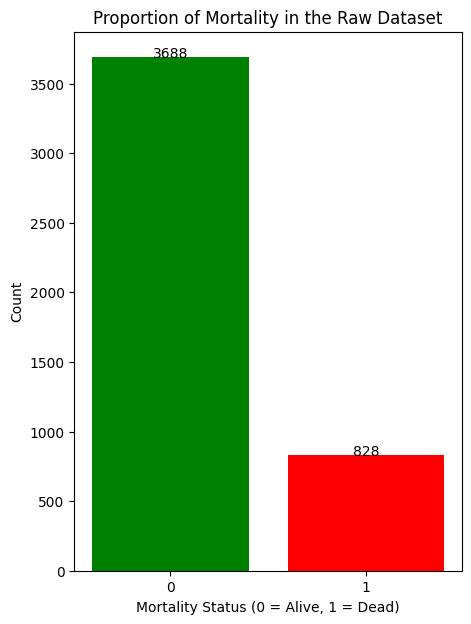

In [6]:
# Count values for 'mortality_status'
mortality_counts = df['mortality_status'].value_counts()

# Create a bar chart
plt.figure(figsize=(5, 7))
plt.bar(mortality_counts.index,
        mortality_counts.values, color=['green', 'red'])

plt.xlabel('Mortality Status (0 = Alive, 1 = Dead)')
plt.ylabel('Count')
plt.title('Proportion of Mortality in the Raw Dataset')

for index, value in enumerate(mortality_counts.values):
    plt.text(index, value, str(value), ha='center')
plt.savefig('../plots/mortality_status_plot_original.png',
            dpi=300, bbox_inches='tight')

plt.show()

In [7]:
df.rename(columns={'ventilation_duration': 'ventilation_used'}, inplace=True)
pd.set_option('display.max_columns', None)

print(df)

      subject_id   hadm_id gender  anchor_age                    race  \
0       14985844  23126369      M          71                   WHITE   
1       19232236  26305336      M          42                   WHITE   
2       14428378  21698209      M          77                   WHITE   
3       16648184  28237094      M          74                   WHITE   
4       14553598  23439649      F          34  BLACK/AFRICAN AMERICAN   
...          ...       ...    ...         ...                     ...   
4511    12025783  26978470      M          78                   WHITE   
4512    14131015  23850711      F          80  WHITE - OTHER EUROPEAN   
4513    16964010  23920941      F          50         ASIAN - CHINESE   
4514    18965721  27282483      F          62                   WHITE   
4515    19247572  25307835      F          88                   WHITE   

         admission_type insurance marital_status  stay_id  item_51006  \
0              EW EMER.  Medicare        MARRIED  

In [9]:
# List of continuous variables
continuous_variables = [
    'anchor_age', 'item_51006', 'item_51221', 'item_51222', 'item_51265', 'item_51301',
    'total_drugs', 'unique_drugs', 'lods_score', 'oasis_score', 'sodium', 'potassium',
    'creatinine', 'bun', 'urine_output_total', 'pt', 'inr', 'systolic_bp', 'diastolic_bp',
    'mean_arterial_pressure', 'heart_rate', 'resp_rate', 'temperature', 'spo2', 'glucose',
    'hospital_stay_duration', 'icu_stay_duration'
]

# List of categorical variables
categorical_variables = [
    'subject_id', 'hadm_id', 'stay_id', 'ventilation_used', 'gender',
    'mortality_status', 'admission_type', 'insurance', 'marital_status', 'race'
] + [col for col in df.columns if col.startswith('procedure_')]

## Mann-Whitney U Test

We perform the Mann-Whitney U test to identify continuous features that have significantly different distributions between the two mortality groups (survived vs. deceased).

- The `mann_whitney_test` function applies the test to each continuous feature.
- Features with p-values below 0.05 are considered significant, indicating they may be useful predictors of mortality.
- We separate the features into significant and not significant groups based on this threshold.

In [10]:
def mann_whitney_test(df, continuous_features, target):
    significant_features = []
    insignificant_features = []
    for feature in continuous_features:
        group1 = df[df[target] == '0'][feature].dropna()
        group2 = df[df[target] == '1'][feature].dropna()

        # Perform Mann-Whitney U Test
        stat, p_value = mannwhitneyu(group1, group2)

        # Check if the p-value is significant
        if p_value < 0.05:
            print(f'Mann-Whitney U Test for {feature}: p-value={p_value}')
            significant_features.append(feature)
        else:
            print(f'Mann-Whitney U Test for {feature}: p-value={p_value}')
            insignificant_features.append(feature)

    print("\nSignificant Features (p-value < 0.05):")
    for feature in significant_features:
        print(feature)

    print("\nInsignificant Features (p-value > 0.05):")
    for feature in insignificant_features:
        print(feature)

    return significant_features


significant_continuous_features_mann_whitney = mann_whitney_test(
    df, continuous_variables, 'mortality_status')

Mann-Whitney U Test for anchor_age: p-value=6.234248111433265e-10
Mann-Whitney U Test for item_51006: p-value=3.1313566850207376e-25
Mann-Whitney U Test for item_51221: p-value=1.6119691150267925e-08
Mann-Whitney U Test for item_51222: p-value=5.195004808104526e-12
Mann-Whitney U Test for item_51265: p-value=4.094365725638167e-05
Mann-Whitney U Test for item_51301: p-value=9.120150432358977e-31
Mann-Whitney U Test for total_drugs: p-value=6.586941548177286e-09
Mann-Whitney U Test for unique_drugs: p-value=1.2315077977135732e-10
Mann-Whitney U Test for lods_score: p-value=1.356966138128657e-116
Mann-Whitney U Test for oasis_score: p-value=6.444302681421559e-118
Mann-Whitney U Test for sodium: p-value=0.3366495753280345
Mann-Whitney U Test for potassium: p-value=0.0011067631752527832
Mann-Whitney U Test for creatinine: p-value=1.1910979933880604e-13
Mann-Whitney U Test for bun: p-value=3.004361324111796e-25
Mann-Whitney U Test for urine_output_total: p-value=8.675598431719067e-13
Mann-Wh

## Chi-square Test

We use the Chi-square test to identify categorical features that have a significant association with the mortality outcome.

- The `chi_square_test` function creates contingency tables for each categorical feature and applies the Chi-square test.
- Features with p-values below 0.05 are considered to have a significant association with mortality.
- We categorize the features as significant or not significant based on this threshold.

In [11]:
def chi_square_test(df, categorical_features, target):
    significant_features = []
    not_significant_features = []

    # Ensure all categorical features are treated as categorical
    for feature in categorical_features:
        df[feature] = df[feature].astype('category')

    for feature in categorical_features:
        if len(df[feature].unique()) == 1:
            continue
        # Create contingency table
        table = pd.crosstab(df[feature], df[target])
        chi2, p_value, _, _ = chi2_contingency(table)
        print(f'Chi-Square Test for {feature}: p-value={p_value}')

        # Classify features as significant or not significant
        if p_value < 0.05:
            significant_features.append(feature)
        else:
            not_significant_features.append(feature)

    return significant_features, not_significant_features


significant_categorical_features_chi_square, not_significant_categorical_features_chi_square = chi_square_test(
    df, categorical_variables, 'mortality_status')

print("Significant categorical features:")
print(significant_categorical_features_chi_square)

print("\nNot significant categorical features:")
print(not_significant_categorical_features_chi_square)

Chi-Square Test for subject_id: p-value=0.49300364098217997
Chi-Square Test for hadm_id: p-value=0.49300364098217997
Chi-Square Test for ventilation_used: p-value=1.7769298444935394e-46
Chi-Square Test for gender: p-value=0.562421015923841
Chi-Square Test for mortality_status: p-value=0.0
Chi-Square Test for admission_type: p-value=1.6138051788341974e-10
Chi-Square Test for insurance: p-value=0.010894703242658307
Chi-Square Test for marital_status: p-value=1.5971647899996797e-41
Chi-Square Test for race: p-value=2.4172735021799677e-21
Chi-Square Test for procedure_221216: p-value=0.6254337825171294
Chi-Square Test for procedure_221217: p-value=0.6860236755325189
Chi-Square Test for procedure_221223: p-value=3.4576813328735774e-07
Chi-Square Test for procedure_221255: p-value=0.074517405122524
Chi-Square Test for procedure_224263: p-value=3.1650656008893062e-40
Chi-Square Test for procedure_224264: p-value=0.7464899167585037
Chi-Square Test for procedure_224267: p-value=0.00023519721745

## Correlation Analysis

We perform a Spearman correlation analysis to identify highly correlated features. This helps in reducing multicollinearity in our dataset.

- The `spearman_correlation` function calculates the correlation matrix and identifies pairs of features with correlation above a specified threshold.
- We visualize the correlation matrix using a heatmap for easier interpretation.

                        anchor_age  item_51006  item_51221  item_51222  item_51265  item_51301  total_drugs  unique_drugs  lods_score  oasis_score    sodium  potassium  creatinine       bun  urine_output_total        pt       inr  systolic_bp  diastolic_bp  mean_arterial_pressure  heart_rate  resp_rate  temperature      spo2   glucose  hospital_stay_duration  icu_stay_duration
anchor_age                1.000000    0.315458   -0.121429   -0.146066   -0.081873   -0.103921    -0.095939     -0.079480    0.124557     0.286207  0.040111   0.062619    0.132410  0.315529           -0.156553  0.086965  0.085433     0.117625     -0.163055               -0.064585   -0.082012   0.010294    -0.151099 -0.061322  0.053905               -0.122314          -0.162337
item_51006                0.315458    1.000000   -0.183109   -0.219209   -0.131568    0.030503     0.101049      0.133424    0.404830     0.236381  0.025356   0.274732    0.684338  0.999994           -0.239869  0.178870  0.180168    -0.0517

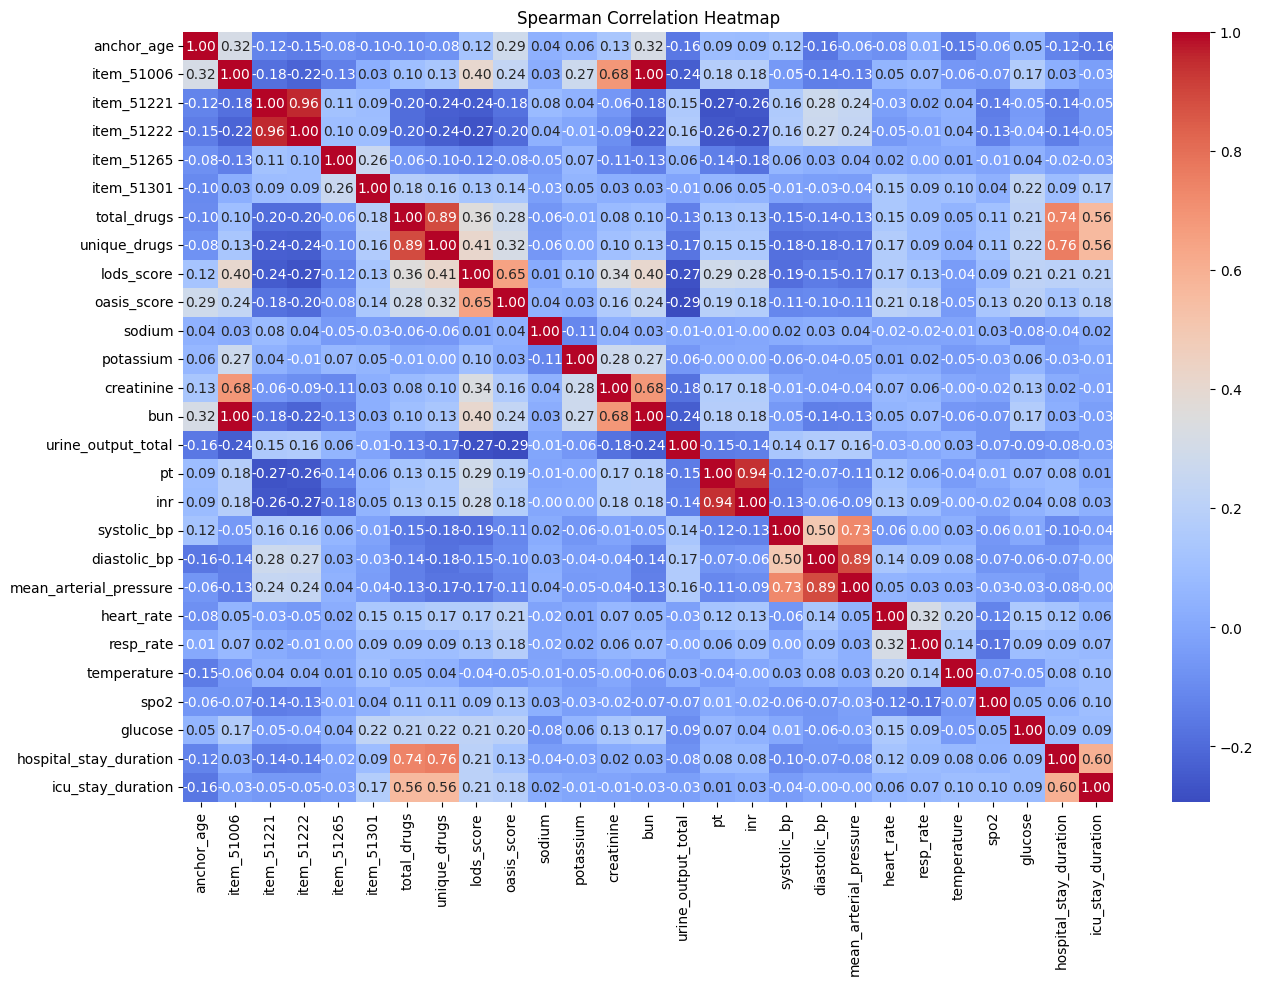

Highly correlated pairs:
('item_51222', 'item_51221')
('unique_drugs', 'total_drugs')
('bun', 'item_51006')
('inr', 'pt')
('mean_arterial_pressure', 'diastolic_bp')


In [12]:
def spearman_correlation(df, continuous_features, threshold=0.8):
    # Calculate the Spearman correlation matrix
    corr_matrix = df[continuous_features].corr(method='spearman')
    print(corr_matrix)

    # Find pairs of features with correlation higher than the threshold
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append(
                    (corr_matrix.columns[i], corr_matrix.columns[j]))
                print(
                    f'Highly correlated pair: {corr_matrix.columns[i]} and {corr_matrix.columns[j]}')

    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Spearman Correlation Heatmap')
    plt.savefig('../plots/spearman_correlation_plot_new.png')
    plt.show()

    return correlated_pairs


correlated_pairs = spearman_correlation(
    df, continuous_variables, threshold=0.8)

print("Highly correlated pairs:")
for pair in correlated_pairs:
    print(pair)